In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
# Loading dictionary of dtype to embed
with open('../../data/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)
    
brain_behav_names = dtype_to_embed['brain'] + dtype_to_embed['behavior']

# Iterating through pulled_embeds and finding union of all brain and behavior vocabs
embeds_path = '../../data/embeds/'
brain_behav_union = set()
for name in tqdm(brain_behav_names):
    vocab = set(pd.read_csv(embeds_path + name + '.csv', index_col=0).index)
    brain_behav_union = brain_behav_union.union(vocab)

len(brain_behav_union)    

  0%|          | 0/16 [00:00<?, ?it/s]

46238

In [5]:
embed_counts = []
embed_path = '../../data/embeds/'
for f_name in tqdm(os.listdir(embed_path)):
    embed_name = f_name.split('.')[0]
    embed = pd.read_csv(embed_path + f_name, index_col=0)
    
    # Subsetting to brain and behavior union
    embed = embed[embed.index.isin(brain_behav_union)]
    
    embed_counts.append([embed_name, embed.shape[0]])

embed_counts = pd.DataFrame(embed_counts, columns=['name', 'count'])
embed_counts

  0%|          | 0/26 [00:00<?, ?it/s]

,name,count
0,fMRI_text_hyper_align,1205
1,norms_sensorimotor,36854
2,EEG_text,3355
3,LexVec_CommonCrawl,44082
4,fastText_CommonCrawl,44443
5,spherical_text_Wikipedia,35533
6,GloVe_CommonCrawl,44278
7,EEG_speech,1591
8,THINGS,1562
9,fMRI_speech_hyper_align,579


In [6]:
# Log transforming the counts
embed_counts['count'] = np.log10(embed_counts['count']) 

# Sorting by count
embed_counts = embed_counts.sort_values(by='count', ascending=False) 
embed_counts

,name,count
4,fastText_CommonCrawl,4.647803
6,GloVe_CommonCrawl,4.646188
3,LexVec_CommonCrawl,4.644261
15,fastText_Wiki_News,4.634910
10,CBOW_GoogleNews,4.631748
16,fastTextSub_OpenSub,4.608601
21,GloVe_Wikipedia,4.595728
1,norms_sensorimotor,4.566485
5,spherical_text_Wikipedia,4.550632
20,GloVe_Twitter,4.517816


In [7]:
with open('../../data/embed_to_dtype.json', 'r') as f:
    embed_to_dtype = json.load(f)

# Adding dtype column and renaming names
embed_counts['dtype'] = embed_counts['name'].map(embed_to_dtype)
embed_counts['name'] = embed_counts['name'].str.replace('_', ' ')
embed_counts

,name,count,dtype
4,fastText CommonCrawl,4.647803,text
6,GloVe CommonCrawl,4.646188,text
3,LexVec CommonCrawl,4.644261,text
15,fastText Wiki News,4.634910,text
10,CBOW GoogleNews,4.631748,text
16,fastTextSub OpenSub,4.608601,text
21,GloVe Wikipedia,4.595728,text
1,norms sensorimotor,4.566485,behavior
5,spherical text Wikipedia,4.550632,text
20,GloVe Twitter,4.517816,text


In [8]:
# Loading psychNorms data
norms = pd.read_csv('../../data/psychNorms/psychNorms.zip', compression='zip', index_col=0, low_memory=False)
meta = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col=0)

# Getting counts of each norm and sorting by count
norm_counts = norms.count().sort_values(ascending=False).reset_index()
norm_counts.columns = ['name', 'count']
norm_counts['category'] = norm_counts['name'].map(meta['category']).str.replace('_', ' ').str.title()

# Log transforming the counts
norm_counts['count'] = np.log10(norm_counts['count'])
norm_counts

,name,count,category
0,Freq_HAL,4.901300,Frequency
1,CD_Blog,4.849088,Semantic Diversity
2,Freq_Blog,4.849088,Frequency
3,Freq_Twitter,4.849088,Frequency
4,Freq_News,4.849088,Frequency
...,...,...,...
287,imageability_citron,2.477121,Imageability
288,aoa_citron,2.477121,Age Of Acquisition
289,familiarity_citron,2.477121,Familiarity
290,arousal_citron,2.477121,Arousal


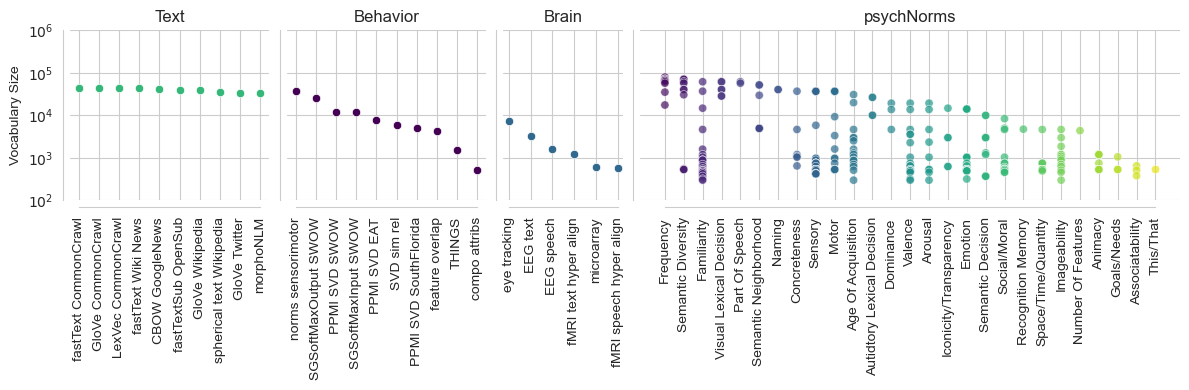

In [9]:
with open('../../data/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)

width_ratios = [len(dtype_to_embed[dtype]) for dtype in ['text', 'behavior', 'brain']] + [len(norm_counts['category'].unique())]

# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}

fig, axs = plt.subplots(1, 4, figsize=(12, 4), width_ratios=width_ratios, sharey=True)

# Text embed counts
sns.scatterplot(
    embed_counts.query('dtype == "text"'), x='name', y='count', color=embed_type_to_color['text'],  ax=axs[0]
)
ymin, ymax = 2, 6
axs[0].set(
    ylim=(ymin, ymax), yticks=range(ymin, ymax+1), yticklabels=[f'$10^{i}$' for i in range(ymin, ymax+1)], 
    ylabel='Vocabulary Size', title='Text'
)

# Behavior embed counts
sns.scatterplot(
    embed_counts.query('dtype == "behavior"'), x='name', y='count', color=embed_type_to_color['behavior'], ax=axs[1]
)
axs[1].set(title='Behavior')

# Brain embed counts
sns.scatterplot(
    embed_counts.query('dtype == "brain"'), x='name', y='count', color=embed_type_to_color['brain'], ax=axs[2]
)
axs[2].set(title='Brain')

# Norms
sns.scatterplot(
    norm_counts, x='category', y='count', hue='category', palette='viridis', legend=False, alpha=0.7,
    ax=axs[3]
)
axs[3].set(title='psychNorms', yticks=range(ymin, ymax+1), ylabel='PAD')

for ax in axs:
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.set(xlabel='' )

# Adds ylabel to last plot by freeing it from the shared y-axis
axs[3].set(ylabel='Vocabulary Size')


sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.savefig('../../figures/vocab_sizes.png', dpi=300)